In [9]:
import dgl
import torch
from torch._C import device
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from dgl.data import MiniGCDataset
from dgl.nn.pytorch import GraphConv
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# 指定节点数和边数
num_nodes = 84
num_edges = 416

# 随机生成边的源节点和目标节点索引
edges_src = torch.randint(0, num_nodes, (num_edges,))
print(edges_src)
edges_dst = torch.randint(0, num_nodes, (num_edges,))
print(edges_dst)

# 使用dgl.graph创建图，传入边的列表
graph = dgl.graph((edges_src, edges_dst))

# 为节点特征赋值
node_features = torch.rand(num_nodes, 25)  # 假设每个节点有25个特征
graph.ndata['feat'] = node_features

# 为边特征赋值
edge_features = torch.rand(num_edges, 1)  # 假设每条边有1个特征
graph.edata['feat'] = edge_features

# 打印图信息
print(graph)

tensor([54, 72, 33, 37, 55, 56, 58, 60, 50, 47, 40, 36, 45, 77, 68,  2, 72, 60,
        62, 83, 81, 83, 42, 31, 27, 12, 26, 69,  7, 70, 50, 72, 70, 60, 17, 44,
        32, 34,  8, 38, 83, 17, 29, 76, 13, 51,  4,  6, 33, 78, 78, 41, 33,  0,
        58, 13, 30, 80, 23, 17, 35, 37,  0, 59, 54, 43, 72, 83, 31,  3, 64, 64,
        57, 58, 18, 12,  5, 41, 83, 71,  8, 20, 18, 21, 42, 33, 51,  8,  3, 55,
        12, 65, 35, 33,  5, 30, 30,  7, 70, 72, 29,  8, 14, 59, 40, 28, 30, 42,
        34, 31, 77, 42, 65, 32, 27, 65, 82, 27, 82, 56, 68,  7, 69, 17, 67, 21,
        26,  2, 38, 68, 59, 83, 65, 10, 58, 18, 53, 32, 30, 12, 30, 71, 61, 58,
         1,  7, 56,  3, 75, 61, 32, 44, 12,  4, 30, 76, 82,  8, 20, 45, 42, 56,
        27,  6, 29, 75, 50, 34, 60, 11, 42, 49, 73,  6, 25, 80, 13, 42, 79, 27,
        58,  8, 18, 36, 51, 30, 47, 52,  4,  2, 52, 63,  0,  8, 39, 72, 33, 79,
         7,  6, 31, 14, 61, 10, 12, 60, 81, 47, 33, 54,  5, 40, 60,  3, 37, 52,
        31, 33, 23, 39,  2, 12,  2, 31, 

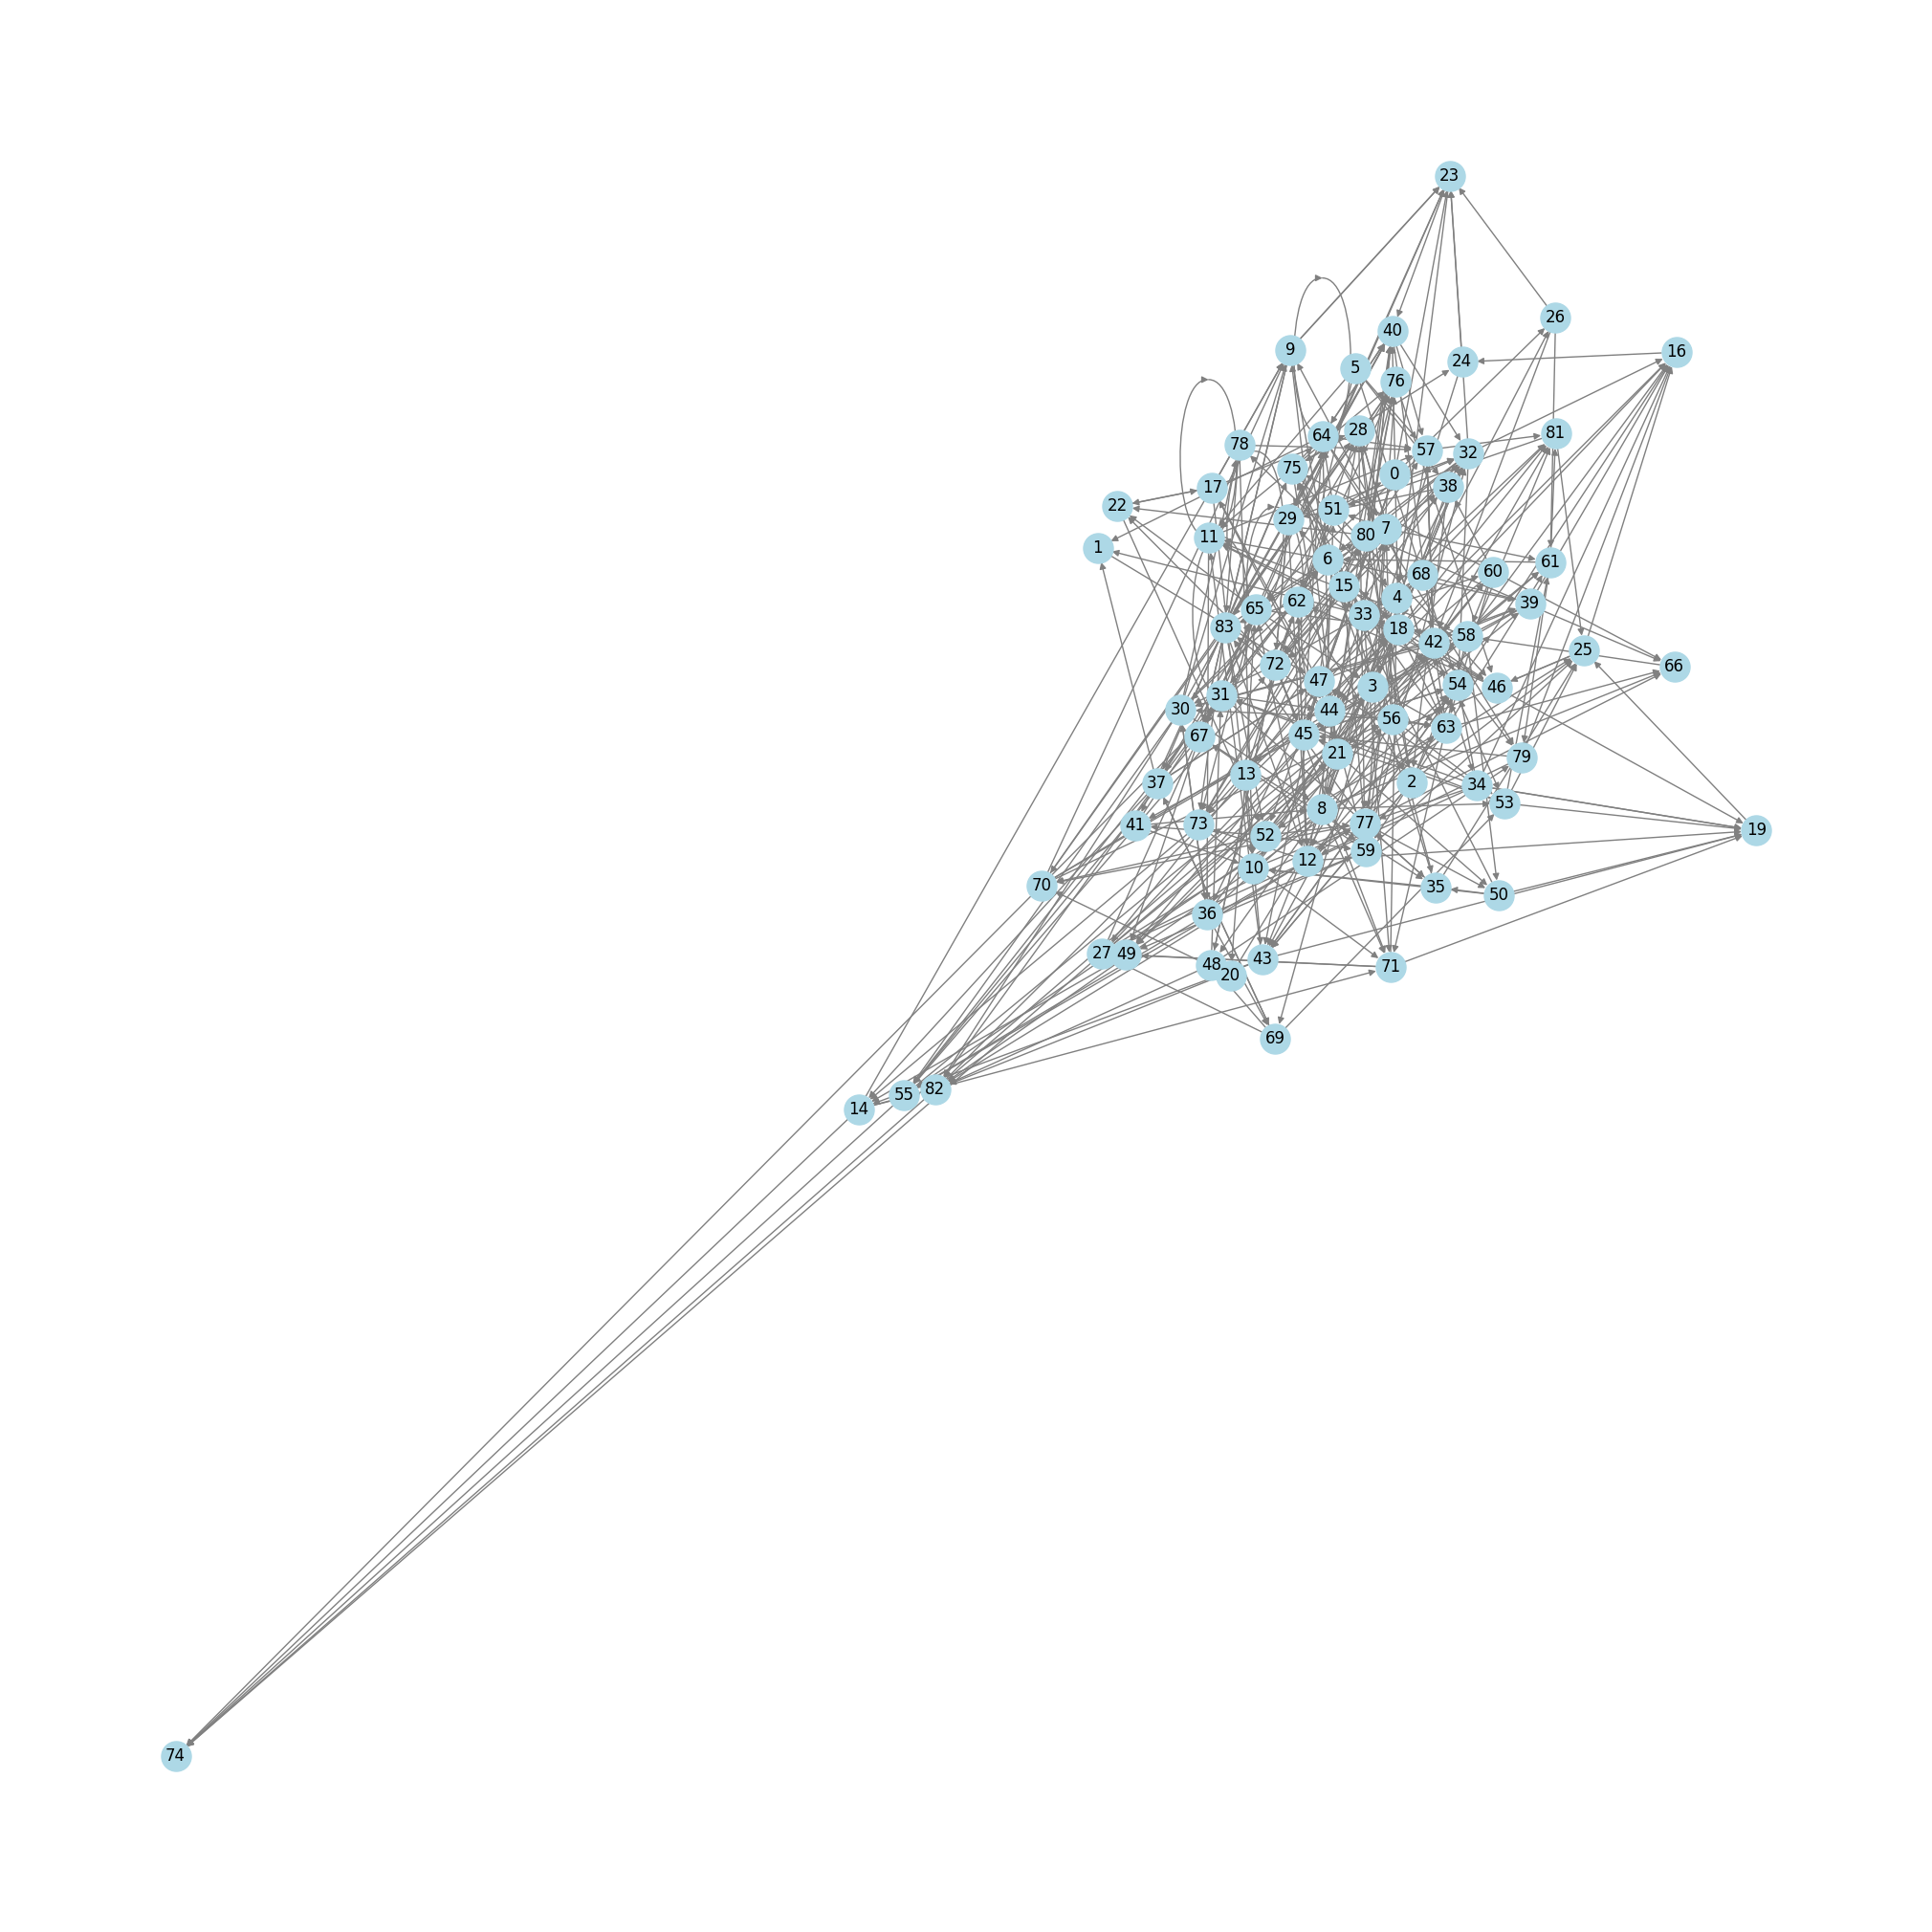

In [16]:
plt.figure(figsize = (20, 20))

nx_graph = graph.to_networkx()

# 为 NetworkX 图设置节点位置
# pos = nx.kamada_kawai_layout(nx_graph)
pos = nx.spring_layout(nx_graph)
# pos = nx.circular_layout(nx_graph)
# pos = nx.shell_layout(nx_graph)
# pos = nx.random_layout(nx_graph)
# pos = nx.spectral_layout(nx_graph)
# pos = nx.planar_layout(nx_graph)

# 绘制图形
nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')

# 显示图形
plt.show()